## <font color='blue'> compute Homogenity and Silhouette Scores </font>
==============================================================

#### This Code is Written by:    Phd Student  <font color=Blue> Dalia A. A. Al-Ubaidi </font> <br> <div class="alert alert-info">University Technology Malaysia, UTM</div> <br> Email: aadalia-1980@graduate.utm.my
***

In [27]:
# from nilearn import datasets

# # Download the ADHD dataset
# dataset = datasets.fetch_adhd(n_subjects=5)

# phenotypic_info = dataset.phenotypic

# adhd_labels = phenotypic_info['adhd']

# for i in range(0,len(dataset)+1):
#     print(f"i={i} {dataset.func[i]} {adhd_labels[i]} ")

# print(adhd_labels)

In [28]:
import numpy as np
from scipy.stats import pearsonr

# Assuming you have a 2D numpy array called 'fmri_data' where each row represents a subject and each column represents a voxel
def Find_Correlation_Matrix(fmri_data):
    
# Compute the correlation matrix
    correlation_matrix = np.corrcoef(fmri_data, rowvar=False)

# Alternatively, if you want to compute the correlation coefficient and p-value for each pairwise combination
# Create an empty correlation matrix
    correlation_matrix = np.zeros((fmri_data.shape[1], fmri_data.shape[1]))
    print('Corr matrix size=', correlation_matrix.shape)
# Loop through each pair of voxels
    for i in range(fmri_data.shape[1]):
        for j in range(i, fmri_data.shape[1]):
        # Compute the correlation coefficient and p-value
            correlation, p_value = pearsonr(fmri_data[:, i], fmri_data[:, j])
        
        # Store the correlation coefficient in the matrix
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation

# Print the correlation matrix
    print(correlation_matrix)
    return correlation_matrix


In [29]:
def get_atlas_labels(atlas_data):
# Get the label numbers from the atlas
    atlas_labels = np.unique(atlas_data.astype(int))
# Get number of labels that we have
    NUM_LABELS = len(atlas_labels)
    print('no. of labels=',NUM_LABELS, '\nlabels numbers=',atlas_labels)



def load_img_cmfd(func_file,confound_file):
    #Load functional image
    tr_drop = 4
#     func_img = nimg.load_img(func_file)
    func_img =nib.load(func_file)

    #Remove the first 4 TRs
    func_img = func_img.slicer[:,:,:,tr_drop:]

    #Use the above function to pull out a confound matrix
    confounds = extract_confounds(confound_file,[])
    #['trans_x','trans_y','trans_z',
    # 'rot_x','rot_y','rot_z',
    # 'global_signal',
    # 'white_matter','csf']
    #Drop the first 4 rows of the confounds matrix
    confounds = confounds[tr_drop:,:] 
    return func_img,confounds

# Refer to part_06 for code + explanation
def extract_confounds(confound_tsv,confounds,dt=[False]):
    '''
    Arguments:
        confound_tsv                    Full path to confounds.tsv
        confounds                       A list of confounder variables to extract
        dt                              Compute temporal derivatives [default = True]
        
    Outputs:
        confound_mat                    
    '''
    
    if dt:    
        dt_names = ['{}_derivative1'.format(c) for c in confounds]
        confounds = confounds + dt_names
    
    #Load in data using Pandas then extract relevant columns
    confound_df = pd.read_csv(confound_tsv,delimiter='\t') 
    confound_df = confound_df[confounds]
    
 
    #Convert into a matrix of values (timepoints)x(variable)
    confound_mat = confound_df.values 
    
    #Return confound matrix
    return confound_mat

In [30]:
# Atlas1= 'Hexa_AAL.nii.gz'
# Atlas2= 'HexaNet_ATLAS.nii.gz'

def ADHDType(label_No):
    label = 'ADHD' if label_No else 'Typical Development'
    return label


# Download the ADHD dataset
dataset = datasets.fetch_adhd(n_subjects=30)
adhd_labels = dataset.phenotypic['adhd']
subject_ids = dataset.phenotypic['Subject']

adhd=[]
# print(f"length data = {dataset}")
for i in range(0,30):
    adhd.append(ADHDType(adhd_labels[i]))
    print(f"i={i}..id={subject_ids[i]}.. ADHD={adhd_labels[i]} {adhd[i]}")  #path={dataset.func[i]}


i=0..id=10042.. ADHD=1 ADHD
i=1..id=10064.. ADHD=1 ADHD
i=2..id=10128.. ADHD=0 Typical Development
i=3..id=21019.. ADHD=0 Typical Development
i=4..id=23008.. ADHD=0 Typical Development
i=5..id=23012.. ADHD=1 ADHD
i=6..id=27011.. ADHD=1 ADHD
i=7..id=27018.. ADHD=1 ADHD
i=8..id=27034.. ADHD=1 ADHD
i=9..id=27037.. ADHD=1 ADHD
i=10..id=1019436.. ADHD=1 ADHD
i=11..id=1206380.. ADHD=1 ADHD
i=12..id=1418396.. ADHD=0 Typical Development
i=13..id=1517058.. ADHD=0 Typical Development
i=14..id=1552181.. ADHD=1 ADHD
i=15..id=1562298.. ADHD=0 Typical Development
i=16..id=1679142.. ADHD=0 Typical Development
i=17..id=2014113.. ADHD=1 ADHD
i=18..id=2497695.. ADHD=1 ADHD
i=19..id=2950754.. ADHD=1 ADHD
i=20..id=3007585.. ADHD=0 Typical Development
i=21..id=3154996.. ADHD=1 ADHD
i=22..id=3205761.. ADHD=1 ADHD
i=23..id=3520880.. ADHD=1 ADHD
i=24..id=3624598.. ADHD=0 Typical Development
i=25..id=3699991.. ADHD=0 Typical Development
i=26..id=3884955.. ADHD=0 Typical Development
i=27..id=3902469.. ADHD=0 Ty

In [31]:
HexaL=[0, 5, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 1, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 5, 2, 4, 4, 4, 4, 4, 4, 4,
   4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 3, 3, 2, 2, 3, 3, 4, 2, 4, 4, 5, 5, 4, 4, 6, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4,
   4, 4, 3, 4, 4, 4, 3, 2, 4, 6, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4]

print(f" {len(HexaL)}")

 117


In [48]:
 #-------------------     Load ADHD Dataset   ----------------------------------
#################################################################################
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure
from nilearn import maskers 
from nilearn import datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nibabel as nib
import numpy as np
from nilearn import datasets
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn.regions import connected_label_regions
from nilearn.maskers import NiftiLabelsMasker 
from nilearn import maskers
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def plot_confusion_matrix(confusion_matrix, labels, MatxTitle):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=False, fmt="f", cmap="Blues", cbar=True,  #jet
                xticklabels=labels, yticklabels=labels)
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('True')
    ax.set_title(MatxTitle)
    plt.show()

def Correlation_Matrix(Signals):
    ARR_CM=[]
    correlation_measure = ConnectivityMeasure(kind='correlation')
#     yeo_full_correlation_matrix = correlation_measure.fit_transform([yeo_cleaned_and_averaged_time_series])
    for Sig in Signals:
        print('Sig.shape=',Sig.shape)
        full_correlation_matrix = correlation_measure.fit_transform([Sig])
        print('inside full_correlation_matrix', full_correlation_matrix)
        ARR_CM.append(full_correlation_matrix)
    # full_correlation_matrix.shape    
    return ARR_CM


# print(f"------------------length adhd_dataset--------{len(adhd_dataset)}----------------\n\n\n")
# No_ROI=0
ARR_Signals=[]
#     ListNames=[]
Atlas= 'HexaNet_ATLAS.nii.gz' 
# '1stRSN_10K_AUN_5_ATLASES.nii.gz'
# '6thRSN_10K_VAN_5_ATLASES.nii.gz'
# '5thRSN_100_SMN_5_ATLASES.nii.gz'
# '4thRSN_100_DMN_5_ATLASES.nii.gz'
# '3rdRSN_100_DAN_5_ATLASES.nii.gz'
# '2ndRSN_100_CCN_5_ATLASES.nii.gz'
# '1stRSN_100_AUN_5_ATLASES.nii.gz'
# 'New_AAL.nii.gz' #'power264MNI.nii.gz' #'Hexa_AAL.nii.gz' #'Hexa_AAL.nii.gz' #'HexaNet_ATLAS.nii.gz' 

for i in range(5,6): # <------------------------------- length of subjects   len(adhd_dataset.func)
    idx=i
    func_file = dataset.func[i] #adhd_dataset.func[idx] 
    phtype= adhd_labels[i]
#     if phtype==0:
#         continue
    print(f" type of this subject is {phtype}   0=typical 1=ADHD")
    confound_file =  dataset.confounds[idx]    # mask_file =  mask_files[i]
# ===========ListNames.append(func_file)
    func_img, confounds=load_img_cmfd(func_file,confound_file)
#     tr_drop = 4
#     func_img =nib.load(func_file)
#     func_img = func_img.slicer[:,:,:,tr_drop:]

    
    parcle_img=nib.load(Atlas)
    parcle_data = parcle_img.get_fdata()
    
    max_Label=int(np.max(parcle_data) )  
    print('max_Label', max_Label)
    
    get_atlas_labels(parcle_data)
    print(f"atlas data size={parcle_data.shape}")
# ------------------------------------------------------------------------------------
    Masker =NiftiLabelsMasker(parcle_img, standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True,
                                      low_pass = 0.08,    #    0.1
                                      high_pass = 0.009,  #    0.01
                                      t_r=2)   
#     ---------------------------------------------------------------------------
    Masker.fit()     
    tr_drop=4
    cleaned_and_averaged_time_series = Masker.transform(func_img)  #func_file)
    print('cleaned_and_averaged_time_series  =', cleaned_and_averaged_time_series)
    non_zero_count = np.count_nonzero(cleaned_and_averaged_time_series)
    print('non zero values in cleaned_and_averaged_time_series =', non_zero_count, ' from total=???' )
    
    
    cleaned_and_averaged_time_series = cleaned_and_averaged_time_series[tr_drop:,:]
    print('cleaned data -- ', cleaned_and_averaged_time_series.shape)
    
    # Get the label numbers from the atlas

    atlas_labels = np.unique(parcle_data.astype(int))
    print('parcle_data.shape =', parcle_data.shape )
    
    NUM_LABELS = len(atlas_labels)
    print('NUM_LABELS=', NUM_LABELS)
    
    # Remember fMRI images are of size (x,y,z,t)
    # where t is the number of timepoints
    num_timepoints = func_img.shape[3]

    # Create an array of zeros that has the correct size
#     final_signal = np.zeros((num_timepoints, NUM_LABELS)) 
    final_signal = np.zeros((num_timepoints-tr_drop, max_Label+1))
    print('final signal size - ', final_signal.shape)
    
    regions_kept = np.array(Masker.labels_)
    regions_kept = regions_kept.astype(int)
    print('Masker.labels_  ', len(Masker.labels_))
    print('(region_Kepts)= ', regions_kept)
    
     # Fill columns matching labels with signal values
    final_signal[:, regions_kept] = cleaned_and_averaged_time_series
    
    
    valid_regions_signal = final_signal[:, regions_kept]
    print('ROI (valid_regions_signal) Shape=',valid_regions_signal.shape)
    print(' valid_regions_signal=',valid_regions_signal)
    
    non_zero_count = np.count_nonzero(valid_regions_signal)
    print('non zero values in valid_regions_signal =', non_zero_count, ' from total=???', )
    
    No_ROI=valid_regions_signal.shape[1]
        
    ARR_Signals.append(valid_regions_signal)

ARR_Signals=np.array(ARR_Signals)
print(f"shape of ARR_Signals= {ARR_Signals.shape}")
ARR_CM=Correlation_Matrix(ARR_Signals)
connectivity_matrices = np.array(ARR_CM)
print('CM shape=',connectivity_matrices.shape)
average_connectivity_matrix = np.mean(connectivity_matrices, axis=0)

# -------------------------------Save Matrix -----------------------
import pickle

# Matrix to be saved
matrix = average_connectivity_matrix

# Saving the matrix
# ADHDFName='Corr_matrix_AvgADHD_Subjects.pkl'

# TypDevFName='Corr_matrix_10K_1AUN_AvgADHD_Subjects.pkl'
# with open(TypDevFName, 'wb') as file:
#     pickle.dump(matrix, file)
#     print(f"Saving File {TypDevFName} is Done")
# --------------------------------------------------------------------
print('Conn Matrix size=', average_connectivity_matrix.shape)
print("Done")

# plot_confusion_matrix(average_connectivity_matrix[0],['AUN','CCN','SMN','DMN','DMN','VAN'], 'ADHD Matrix')

 type of this subject is 1   0=typical 1=ADHD
max_Label 6
no. of labels= 7 
labels numbers= [0 1 2 3 4 5 6]
atlas data size=(182, 218, 182)
[NiftiLabelsMasker.fit] loading data from Nifti1Image('HexaNet_ATLAS.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x00000123B5091F10>, <nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x00000123AA8A8C10>, 
{ 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.009,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x00000123A7375F70>,
  'low_pass': 0.08,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=N

parcle_data.shape = (182, 218, 182)
NUM_LABELS= 7
final signal size -  (69, 7)
Masker.labels_   6
(region_Kepts)=  [1 2 3 4 5 6]
ROI (valid_regions_signal) Shape= (69, 6)
 valid_regions_signal= [[-1.12922966e+00 -7.18724057e-02  2.05695182e-01 -3.20875257e-01
  -8.72977734e-01 -1.57888889e+00]
 [-9.23941612e-01  1.27455950e-01 -8.33669379e-02  8.07636306e-02
  -7.54688442e-01 -1.22736859e+00]
 [-8.66470397e-01 -1.02499567e-01 -5.90349257e-01  1.56880114e-02
  -6.34818733e-01 -8.12359333e-01]
 [-9.02983308e-01 -6.83685422e-01 -1.15737283e+00 -5.07646263e-01
  -5.64466298e-01 -4.42906559e-01]
 [-8.93033803e-01 -1.29763639e+00 -1.60088134e+00 -1.18067324e+00
  -5.94255567e-01 -2.19518766e-01]
 [-7.60023355e-01 -1.60636950e+00 -1.81003082e+00 -1.61669564e+00
  -7.36254513e-01 -2.15121925e-01]
 [-5.46217024e-01 -1.45553517e+00 -1.75926292e+00 -1.57975936e+00
  -9.06368971e-01 -4.00153488e-01]
 [-3.44543010e-01 -9.35522616e-01 -1.46487057e+00 -1.08525157e+00
  -9.36861992e-01 -6.00927949e-01

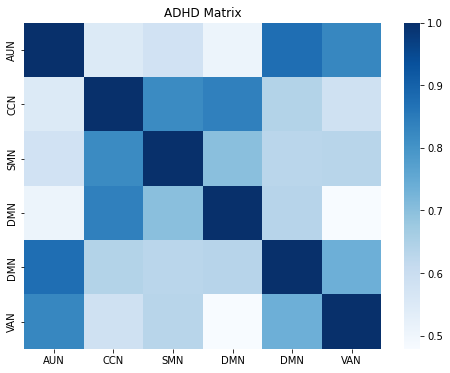

In [49]:
CM2= average_connectivity_matrix[0]
def plot_confusion_matrix(confusion_matrix, labels, MatxTitle):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=False, fmt="f", cmap="Blues", cbar=True,  #jet
                xticklabels=labels, yticklabels=labels)
    
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('True')
    ax.set_title(MatxTitle)
    plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_confusion_matrix(confusion_matrix, labels):
#     plt.figure(figsize=(8, 8))
#     ax = sns.heatmap(confusion_matrix, annot=False, cmap='Blues', cbar=False)

#     ax.set_xticklabels(labels, rotation=90)
#     ax.set_yticklabels(labels, rotation=0)
#     ax.xaxis.tick_top()
#     ax.yaxis.tick_left()

#     ax.xaxis.set_label_position('top')
#     ax.yaxis.set_label_position('left')

#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')

#     plt.show()
    
    
    
plot_confusion_matrix(CM2,['AUN','CCN','SMN','DMN','DMN','VAN'] , 'ADHD Matrix')

In [52]:
import networkx as nx
import pylab as plt

# print(CM2)




# A = np.array([[0,0,1,0],[1,0,0,0],[1,0,0,1],[1,0,0,0]])
G = nx.DiGraph(CM2)

# pos = [[0,0], [0,1], [1,0], [1,1]]
# nx.draw(G,pos)
# plt.show()



graph = G # karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels = graph.labels

image = svg_graph(adjacency, position, labels=labels)
SVG(image)

AttributeError: 'DiGraph' object has no attribute 'position'

In [34]:
import warnings
warnings.filterwarnings("ignore")


def Get_Average_Signal(ARR_Signals):
    
    # print(f"size of ARR Signal : {ARR_Signals[0].shape},{type(ARR_Signals)}")
    # for i in range(0,ARR_Signals.shape[0]):
    #     print(f"size of signal no. {i} = {ARR_Signals[i].shape}")

    Arr= np.zeros((len(ARR_Signals), ARR_Signals[0].shape[1]))
    print(f"Arr size={Arr.shape}")

    for i,Sig in enumerate(ARR_Signals):
        print(f"i={i}")
        Arr[i]=np.mean(ARR_Signals[i], axis=0) 
        print(f"Arr[{i}] size= {Arr[i].shape}")

    Final_Sig=np.mean(Arr, axis=0)
    print(f" Final Signal size={Final_Sig.shape}")
    return Final_Sig

def Get_Subject_Signal(Atlas, Type):
    # Type parameter is 1 for ADHD and 0 for TDs
    
    ARR_Signals=[]
    for i in range(0,30): # <------------------------------- length of subjects   len(adhd_dataset.func)
        idx=i
        func_file = dataset.func[i] #adhd_dataset.func[idx] 
        phtype= adhd_labels[i]
        if phtype !=Type:
            continue
        print(f" type of this subject is {phtype}   0=typical 1=ADHD")
        confound_file =  dataset.confounds[idx]    # mask_file =  mask_files[i]
# ===========ListNames.append(func_file)
        func_img, confounds=load_img_cmfd(func_file,confound_file)
#     tr_drop = 4
#     func_img =nib.load(func_file)
#     func_img = func_img.slicer[:,:,:,tr_drop:]

    
        parcle_img=nib.load(Atlas)
        parcle_data = parcle_img.get_fdata()
    
        max_Label=int(np.max(parcle_data) )  
        print('max_Label', max_Label)
    
        get_atlas_labels(parcle_data)
        print(f"atlas data size={parcle_data.shape}")
# ------------------------------------------------------------------------------------
        Masker =NiftiLabelsMasker(parcle_img, standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True,
                                      low_pass = 0.08,
                                      high_pass = 0.009,
                                      t_r=2)   
#     ---------------------------------------------------------------------------
        Masker.fit()     
        tr_drop=4
        cleaned_and_averaged_time_series = Masker.transform(func_img)  #func_file)
        print('cleaned_and_averaged_time_series  =', cleaned_and_averaged_time_series)
        non_zero_count = np.count_nonzero(cleaned_and_averaged_time_series)
        print('non zero values in cleaned_and_averaged_time_series =', non_zero_count, ' from total=???' )
    
    
        cleaned_and_averaged_time_series = cleaned_and_averaged_time_series[tr_drop:,:]
        print('cleaned data -- ', cleaned_and_averaged_time_series.shape)
    
        # Get the label numbers from the atlas

        atlas_labels = np.unique(parcle_data.astype(int))
        print('parcle_data.shape =', parcle_data.shape )
    
        NUM_LABELS = len(atlas_labels)
        print('NUM_LABELS=', NUM_LABELS)
    
        # Remember fMRI images are of size (x,y,z,t)
        # where t is the number of timepoints
        num_timepoints = func_img.shape[3]

        # Create an array of zeros that has the correct size
        #  final_signal = np.zeros((num_timepoints, NUM_LABELS)) 
        final_signal = np.zeros((num_timepoints-tr_drop, max_Label+1))
        print('final signal size - ', final_signal.shape)
    
        regions_kept = np.array(Masker.labels_)
        regions_kept = regions_kept.astype(int)
        print('Masker.labels_  ', len(Masker.labels_))
        print('(region_Kepts)= ', regions_kept)
    
        # Fill columns matching labels with signal values
        final_signal[:, regions_kept] = cleaned_and_averaged_time_series
    
    
        valid_regions_signal = final_signal[:, regions_kept]
        print('ROI (valid_regions_signal) Shape=',valid_regions_signal.shape)
        print(' valid_regions_signal=',valid_regions_signal)
    
        non_zero_count = np.count_nonzero(valid_regions_signal)
        print('non zero values in valid_regions_signal =', non_zero_count, ' from total=???', )
    
        No_ROI=valid_regions_signal.shape[1]
        
        ARR_Signals.append(valid_regions_signal)
    
    return ARR_Signals


AtlasList=['1stRSN_10K_AUN_5_ATLASES.nii.gz',
           '2ndRSN_10K_CCN_5_ATLASES.nii.gz',
           '3rdRSN_10K_DAN_5_ATLASES.nii.gz',
           '4thRSN_10K_DMN_5_ATLASES.nii.gz',
           '5thRSN_10K_SMN_5_ATLASES.nii.gz',
           '6thRSN_10K_VAN_5_ATLASES.nii.gz']

# for i in range(0,len(AtlasList)-1):
#     for j in range(i+1, len(AtlasList)):
#         print(f" ij = {i} {j}")
#         Type=1 # ADHD       # Type=0 # TDs
       
        
#         ARR_Signals_j= Get_Subject_Signal(AtlasList[j], Type)
        # ------------------------------------------------------
for i in range(0,len(AtlasList)):
    for Type in range(0,2):
        ARR_Signals_i= Get_Subject_Signal(AtlasList[i], Type)
        ARR_Signals_i=np.array(ARR_Signals_i)
        print(f"shape of ARR_Signals {i}= {ARR_Signals_i.shape}")
#         Final_Sig_i=Get_Average_Signal(ARR_Signals_i)
        tt='ADHD' if Type==1 else 'TDs'
        Fname= "ArrSignal_"+AtlasList[i][0:3]+AtlasList[i][11:14]+"_"+tt+".pkl"
        with open(Fname, 'wb') as file:
            pickle.dump(ARR_Signals_i, file)
            print(f"Saving File {Fname} is Done")
        # -------------------------------------------------------
#         ARR_Signals_j= Get_Subject_Signal(AtlasList[j], Type)
#         ARR_Signals_j=np.array(ARR_Signals_j)
#         print(f"shape of ARR_Signals {j}= {ARR_Signals_j.shape}")
#         Final_Sig_j=Get_Average_Signal(ARR_Signals_j)
        
# ARR_CM=Correlation_Matrix(ARR_Signals)
# connectivity_matrices = np.array(ARR_CM)
# print('CM shape=',connectivity_matrices.shape)
# average_connectivity_matrix = np.mean(connectivity_matrices, axis=0)
print('Done')

 type of this subject is 0   0=typical 1=ADHD


NameError: name 'pd' is not defined

In [ ]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure
from nilearn import maskers 
from nilearn import datasets
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")


def Get_Average_Signal(ARR_Signals):
    
    # print(f"size of ARR Signal : {ARR_Signals[0].shape},{type(ARR_Signals)}")
    # for i in range(0,ARR_Signals.shape[0]):
    #     print(f"size of signal no. {i} = {ARR_Signals[i].shape}")

    Arr= np.zeros((len(ARR_Signals), ARR_Signals[0].shape[1]))
    print(f"Arr size={Arr.shape}")

    for i,Sig in enumerate(ARR_Signals):
#         print(f"i={i}")
        Arr[i]=np.mean(ARR_Signals[i], axis=0) 
#         print(f"Arr[{i}] size= {Arr[i].shape}")

    Final_Sig=np.mean(Arr, axis=0)
#     print(f" Final Signal size={Final_Sig.shape}")
    return Final_Sig

def Make_Arr_Equal(Arr1, Arr2):
    print(f"Arr1={Arr1.shape} {Arr1.shape[0]} ")
    d1=Arr1.shape[0]
    d2=Arr2.shape[0]
    if d1<d2:
        Arr2 = np.resize(Arr2, Arr1.shape)
    else:
        Arr1 = np.resize(Arr1, Arr2.shape)
     
    return Arr1,Arr2

# ArrSignal_1stAUN_ADHD.pkl
List=['1stAUN', '2ndCCN','3rdDAN','4thDMN','5thSMN','6thVAN']
Type=0
ArrTDs=np.zeros((6,6))
ArrADHD=np.zeros((6,6))
for i in range(0,len(List)-1):
    for j in range(i+1, len(List)):
        tt='ADHD' if Type==1 else 'TDs'
        Fname1= "ArrSignal/ArrSignal_"+List[i]+"_"+tt+".pkl"
        Fname2= "ArrSignal/ArrSignal_"+List[j]+"_"+tt+".pkl"
        # ----------------------------------------------------
        # Retrieving the matrix
        with open(Fname1, 'rb') as file1:
            matrix1 = pickle.load(file1)
        ARR_Signals_i=matrix1.copy()
        Final_Sig_i=Get_Average_Signal(ARR_Signals_i)
        # ----------------------------------------------------
        # Retrieving the matrix
        with open(Fname2, 'rb') as file2:
            matrix2 = pickle.load(file2)
        ARR_Signals_j=matrix2.copy()
        Final_Sig_j=Get_Average_Signal(ARR_Signals_j)
        Final_Sig_i,Final_Sig_j = Make_Arr_Equal(Final_Sig_i, Final_Sig_j)
        #------------------------------------------------------
        print(f" size of Sig{i}={Final_Sig_i.shape} while size of Sig{j}={Final_Sig_j.shape}")
        corr_coef, p_value = pearsonr(Final_Sig_i, Final_Sig_j)

        # Print the correlation coefficient and p-value
#         print("\n\nPearson correlation coefficient:", corr_coef)
#         print("p-value:", p_value)
        ArrTDs[i][j]=corr_coef
        


In [ ]:
for i in range(0,len(List)-1):
    for j in range(i+1, len(List)):
        print(f"Corr Btw {List[i]}-{List[j]} = {ArrTDs[i][j]}")

In [858]:
F='ArrSignal_1stAUN_TDs.pkl'
# ----------------------------------------------------
# Retrieving the matrix
with open(F, 'rb') as file:
    matrix2 = pickle.load(file)
    
Matrix=matrix2.copy()[12]
print(f"shape of arr {Matrix.shape}")
print(Matrix)

shape of arr (228, 1307)
[[-0.6722 -1.6072 -0.8903 ... -0.0118 -1.5459  0.    ]
 [-1.8761 -2.8867 -1.1593 ...  0.3457 -1.1108  0.    ]
 [-2.571  -3.3803 -1.0757 ...  0.6611 -0.5519  0.    ]
 ...
 [-0.1764  0.2728 -1.0325 ...  3.4104  1.0174  0.    ]
 [-0.0205  0.2143 -0.3924 ...  1.9294  0.5288  0.    ]
 [ 0.0459  0.283   0.1345 ... -0.0964 -0.2585  0.    ]]


In [847]:
AtlasList=['1stRSN_10K_AUN_5_ATLASES.nii.gz',
           '2ndRSN_10K_CCN_5_ATLASES.nii.gz',
           '3rdRSN_10K_DAN_5_ATLASES.nii.gz',
           '4thRSN_10K_DMN_5_ATLASES.nii.gz',
           '5thRSN_10K_SMN_5_ATLASES.nii.gz',
           '6thRSN_10K_VAN_5_ATLASES.nii.gz']

for i in range(0,len(AtlasList)):
    for Type in range(0,2):
        tt='ADHD' if Type==1 else 'TDs'
        Fname= "ArrSignal_"+AtlasList[i][0:3]+AtlasList[i][11:14]+"_"+tt+".pkl"
        print(Fname)

ArrSignal_1stAUN_TDs.pkl
ArrSignal_1stAUN_ADHD.pkl
ArrSignal_2ndCCN_TDs.pkl
ArrSignal_2ndCCN_ADHD.pkl
ArrSignal_3rdDAN_TDs.pkl
ArrSignal_3rdDAN_ADHD.pkl
ArrSignal_4thDMN_TDs.pkl
ArrSignal_4thDMN_ADHD.pkl
ArrSignal_5thSMN_TDs.pkl
ArrSignal_5thSMN_ADHD.pkl
ArrSignal_6thVAN_TDs.pkl
ArrSignal_6thVAN_ADHD.pkl


In [836]:
AtlasList=['1stRSN_10K_AUN_5_ATLASES.nii.gz',
           '2ndRSN_10K_CCN_5_ATLASES.nii.gz',
           '3rdRSN_10K_DAN_5_ATLASES.nii.gz',
           '4thRSN_10K_DMN_5_ATLASES.nii.gz',
           '5thRSN_10K_SMN_5_ATLASES.nii.gz',
           '6thRSN_10K_VAN_5_ATLASES.nii.gz']
count=0
for i in range(0,len(AtlasList)-1):
    for j in range(i+1, len(AtlasList)):
        count +=1
        print(f"counter={count}  {AtlasList[i]} -----  {AtlasList[j]}")
        

counter=1  1stRSN_10K_AUN_5_ATLASES.nii.gz -----  2ndRSN_10K_CCN_5_ATLASES.nii.gz
counter=2  1stRSN_10K_AUN_5_ATLASES.nii.gz -----  3rdRSN_10K_DAN_5_ATLASES.nii.gz
counter=3  1stRSN_10K_AUN_5_ATLASES.nii.gz -----  4thRSN_10K_DMN_5_ATLASES.nii.gz
counter=4  1stRSN_10K_AUN_5_ATLASES.nii.gz -----  5thRSN_10K_SMN_5_ATLASES.nii.gz
counter=5  1stRSN_10K_AUN_5_ATLASES.nii.gz -----  6thRSN_10K_VAN_5_ATLASES.nii.gz
counter=6  2ndRSN_10K_CCN_5_ATLASES.nii.gz -----  3rdRSN_10K_DAN_5_ATLASES.nii.gz
counter=7  2ndRSN_10K_CCN_5_ATLASES.nii.gz -----  4thRSN_10K_DMN_5_ATLASES.nii.gz
counter=8  2ndRSN_10K_CCN_5_ATLASES.nii.gz -----  5thRSN_10K_SMN_5_ATLASES.nii.gz
counter=9  2ndRSN_10K_CCN_5_ATLASES.nii.gz -----  6thRSN_10K_VAN_5_ATLASES.nii.gz
counter=10  3rdRSN_10K_DAN_5_ATLASES.nii.gz -----  4thRSN_10K_DMN_5_ATLASES.nii.gz
counter=11  3rdRSN_10K_DAN_5_ATLASES.nii.gz -----  5thRSN_10K_SMN_5_ATLASES.nii.gz
counter=12  3rdRSN_10K_DAN_5_ATLASES.nii.gz -----  6thRSN_10K_VAN_5_ATLASES.nii.gz
counter=13  4

In [833]:

def Get_Average_Signal(ARR_Signals):
    
    # print(f"size of ARR Signal : {ARR_Signals[0].shape},{type(ARR_Signals)}")
    # for i in range(0,ARR_Signals.shape[0]):
    #     print(f"size of signal no. {i} = {ARR_Signals[i].shape}")

    Arr= np.zeros((len(ARR_Signals), ARR_Signals[0].shape[1]))
    print(f"Arr size={Arr.shape}")

    for i,Sig in enumerate(ARR_Signals):
        print(f"i={i}")
        Arr[i]=np.mean(ARR_Signals[i], axis=0) 
        print(f"Arr[{i}] size= {Arr[i].shape}")

    Final_Sig=np.mean(Arr, axis=0)
    print(f" Final Signal size={Final_Sig.shape}")
    return Final_Sig

TDsFList=[
    "CorrMatrix/Corr_matrix_10K_1AUN_AvgTDs_Subjects.pkl",
    'CorrMatrix/Corr_matrix_10K_2CCN_AvgTDs_Subjects.pkl',
    'CorrMatrix/Corr_matrix_10K_3DAN_AvgTDs_Subjects.pkl',
    'CorrMatrix/Corr_matrix_10K_4DMN_AvgTDs_Subjects.pkl',
     'CorrMatrix/Corr_matrix_10K_5SMN_AvgTDs_Subjects.pkl',
    'CorrMatrix/Corr_matrix_10K_6VAN_AvgTDs_Subjects.pkl'
        ]
ADHDFList=[
    "CorrMatrix/Corr_matrix_10K_1AUN_AvgADHD_Subjects.pkl",
    'CorrMatrix/Corr_matrix_10K_2CCN_AvgADHD_Subjects.pkl',
    'CorrMatrix/Corr_matrix_10K_3DAN_AvgADHD_Subjects.pkl',
     'CorrMatrix/Corr_matrix_10K_4DMN_AvgADHD_Subjects.pkl',
     'CorrMatrix/Corr_matrix_10K_5SMN_AvgADHD_Subjects.pkl',
    'CorrMatrix/Corr_matrix_10K_6VAN_AvgADHD_Subjects.pkl'
        ]



Final_Sig=Get_Average_Signal(ARR_Signals)
rsn1_voxels=Final_Sig#np.mean(ARR_Signals[0], axis=0) 
rsn2_voxels=Final_Sig#np.mean(ARR_Signals[1], axis=0) 

# print(f"size of Sig1={rsn1_voxels.shape}  while size of Sig2={rsn2_voxels.shape}")
# print(rsn1_voxels)
# # Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(rsn1_voxels, rsn2_voxels)

# Print the correlation coefficient and p-value
print("\n\nPearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Arr size=(13, 1307)
i=0
Arr[0] size= (1307,)
i=1
Arr[1] size= (1307,)
i=2
Arr[2] size= (1307,)
i=3
Arr[3] size= (1307,)
i=4
Arr[4] size= (1307,)
i=5
Arr[5] size= (1307,)
i=6
Arr[6] size= (1307,)
i=7
Arr[7] size= (1307,)
i=8
Arr[8] size= (1307,)
i=9
Arr[9] size= (1307,)
i=10
Arr[10] size= (1307,)
i=11
Arr[11] size= (1307,)
i=12
Arr[12] size= (1307,)
 Final Signal size=(1307,)


Pearson correlation coefficient: 1.0
p-value: 0.0


 ADHD CorrMatrix = (116, 116)


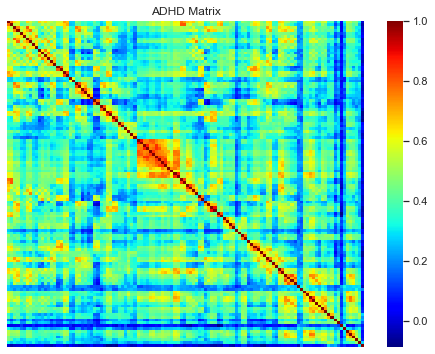

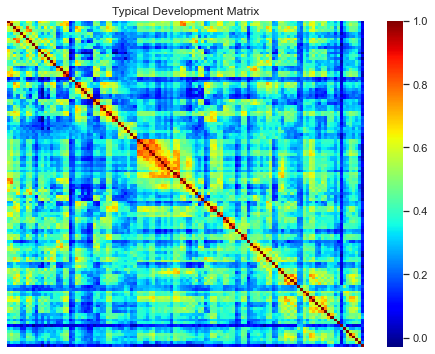

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, labels, MatxTitle):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=False, fmt="f", cmap="jet", cbar=True,
                xticklabels=labels, yticklabels=labels)
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('True')
    ax.set_title(MatxTitle)
    plt.show()

    
ADHDFName='Corr_matrix_AvgADHD_Subjects.pkl'
TypDevFName='Corr_matrix_AvgTypDev_Subjects.pkl'
# Retrieving the matrix
with open(ADHDFName, 'rb') as file:
    matrix1 = pickle.load(file)
    
ADHDMatrix=matrix1.copy()[0]
# ----------------------------------------------------
# Retrieving the matrix
with open(TypDevFName, 'rb') as file:
    matrix2 = pickle.load(file)
    
TypDevMatrix=matrix2.copy()[0]
# ---------------------------------------------------
# print(CorMat)
print(f" ADHD CorrMatrix = {ADHDMatrix.shape}")

plot_confusion_matrix(ADHDMatrix,[],'ADHD Matrix')
plot_confusion_matrix(TypDevMatrix,[], 'Typical Development Matrix')


 dim=(13456, 2)


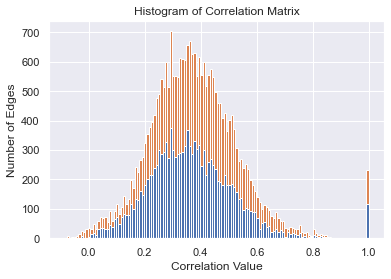

In [641]:
# -------------------------------- Compute Histogram of Corr Matrix------------------------
import numpy as np
import matplotlib.pyplot as plt

correlation_values1 = TypDevMatrix.flatten()
correlation_values2 = ADHDMatrix.flatten()
correlation_values= np.stack((correlation_values1, correlation_values2), axis=1)
print(f" dim={correlation_values.shape}")
# histtype{'bar', 'barstacked', 'step'
plt.hist(correlation_values, bins=130, histtype='bar',stacked=True) #, color='red', density=True)  # You can adjust the number of bins as needed

# counts, bins = np.histogram(correlation_values)
# plt.stairs(counts, bins)


plt.xlabel('Correlation Value')
plt.ylabel('Number of Edges')
plt.title('Histogram of Correlation Matrix')
plt.show()



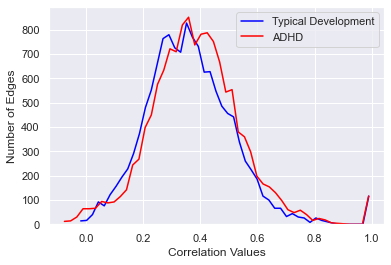

In [638]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def Draw_CorrMatx_Histogram(corr_matrix1,corr_matrix2):

    # Example correlation matrices
    # corr_matrix1 = np.random.rand(15, 15)
    # corr_matrix2 = np.random.rand(15, 15)

    # Flatten the correlation matrices
    corr_values1 = corr_matrix1.flatten()
    corr_values2 = corr_matrix2.flatten()

    # Create a subplot
    fig, ax = plt.subplots()

    # element{“bars”, “step”, “poly”}
    # Plot the histograms
    sns.histplot(corr_values1, bins=50, ax=ax, color='blue', element='poly',fill=False, label='Typical Development')
    sns.histplot(corr_values2, bins=50, ax=ax, color='red', element='poly',fill=False, label='ADHD')

    # Add labels and legends
    ax.set_xlabel('Correlation Values')
    ax.set_ylabel('Number of Edges')
    ax.legend()

    # Display the plot
    plt.show()

Draw_CorrMatx_Histogram(TypDevMatrix,ADHDMatrix)

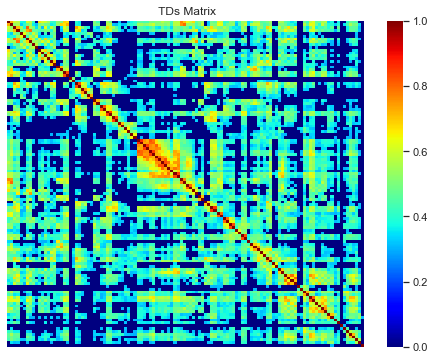

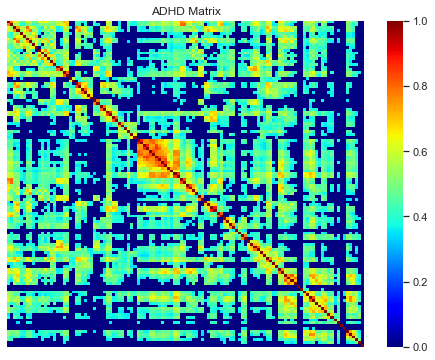

 density for Typ Development = 0.28858522811501397
 density for ADHD = 0.288064229451043


In [707]:
def compute_network_density(correlation_matrix):
    # Create a graph from the correlation matrix
    graph = nx.from_numpy_array(correlation_matrix)
    SSum= np.sum(correlation_matrix)
    # Compute the network density
    num_nodes = len(graph.nodes())
    num_edges = len(graph.edges())
#     print(f" no of nodes={num_nodes} no of edges={num_edges}")
    max_edges = num_nodes * (num_nodes - 1)# / 2  # Maximum number of edges in an undirected graph
#     density = num_edges / max_edges
    density = SSum / max_edges

    return density


CM1=TypDevMatrix
th1=0.30
CM1= np.where(CM1 < th1 , 0, CM1)
den1=compute_network_density(CM1)
plot_confusion_matrix(CM1,[],' TDs Matrix') #, threshold='+str(th1)+" density="+str(den1))
# ------------------------------------------
CM2=ADHDMatrix
th2=0.345
CM2= np.where(CM2 < th2 , 0, CM2)
den2=compute_network_density(CM2)
plot_confusion_matrix(CM2,[], 'ADHD Matrix') #, threshold='+str(th2)+" density="+str(den2))

# den1=compute_network_density(TypDevMatrix)
# den2=compute_network_density(ADHDMatrix)

# plot_confusion_matrix(ADHDMatrix,[],'ADHD Matrix')


print(f" density for Typ Development = {den1}")
print(f" density for ADHD = {den2}")

np.savetxt('TypDevMatrix.csv', TypDevMatrix, delimiter=',')
np.savetxt('ADHDMatrix.csv', ADHDMatrix, delimiter=',')

In [767]:
# adjacency_matrix = np.array([[0, 2, 3],
#                             [2, 0, 1],
#                             [3, 1, 0]])
import networkx as nx
import bct

TDsFList=[
    "CorrMatrix\Corr_matrix_1AUD_AvgTDs_Subjects.pkl",
    'CorrMatrix/Corr_matrix_2CCN_AvgTDs_Subjects.pkl',
    'CorrMatrix/Corr_matrix_3DAN_AvgTDs_Subjects.pkl',
    'CorrMatrix/Corr_matrix_4DMN_AvgTDs_Subjects.pkl',
     'CorrMatrix/Corr_matrix_5SMN_AvgTDs_Subjects.pkl',
    'CorrMatrix/Corr_matrix_6VAN_AvgTDs_Subjects.pkl'
        ]

ADHDFList=[
    "CorrMatrix/Corr_matrix_1AUD_AvgADHD_Subjects.pkl",
    'CorrMatrix/Corr_matrix_2CCN_AvgADHD_Subjects.pkl',
    'CorrMatrix/Corr_matrix_3DAN_AvgADHD_Subjects.pkl',
     'CorrMatrix/Corr_matrix_4DMN_AvgADHD_Subjects.pkl',
     'CorrMatrix/Corr_matrix_5SMN_AvgADHD_Subjects.pkl',
    'CorrMatrix/Corr_matrix_6VAN_AvgADHD_Subjects.pkl'
    
        ]

TDs=[]
ADHD=[]
for i in range(0,6):
    
# -----------------------------------------------------
# Retrieving the matrix
    ADHDFName=ADHDFList[i]
    with open(ADHDFName, 'rb') as file:
        matrix1 = pickle.load(file)
    
    ADHDMatrix=matrix1.copy()[0]
# ----------------------------------------------------
# Retrieving the matrix
    TDsFName=TDsFList[i]
    with open(TDsFName, 'rb') as file:
        matrix2 = pickle.load(file)
    
    TDsMatrix=matrix2.copy()[0]
# ---------------------------------------------------
    D= np.mean(bct.clustering_coef_wu(TDsMatrix))
    H= np.mean(bct.clustering_coef_wu(ADHDMatrix))
    TDs.append(D)
    ADHD.append(H)
    
# global_efficiencyT = bct.efficiency_wei(TDsMatrix)
# global_efficiencyH = bct.efficiency_wei(ADHDMatrix)
# D=nx.average_clustering(nx.from_numpy_array(TDsMatrix), weight=TDsMatrix)
# H=nx.average_clustering(nx.from_numpy_array(ADHDMatrix), weight=ADHDMatrix)

# print(f"Global Efficiency for TDs={global_efficiencyT} for ADHD={global_efficiencyH}")
# print(f"Clustering Coff. for TDs={D} for ADHD={H}")

In [806]:
TDsFName= 'Corr_matrix_10K_3DAN_AvgTDs_Subjects.pkl'
ADHDFName= 'Corr_matrix_10K_3DAN_AvgADHD_Subjects.pkl'

with open(ADHDFName, 'rb') as file:
        matrix1 = pickle.load(file)
    
        ADHDMatrix=matrix1.copy()[0]
# ----------------------------------------------------
# Retrieving the matrix

with open(TDsFName, 'rb') as file:
        matrix2 = pickle.load(file)
    
        TDsMatrix=matrix2.copy()[0]
    
    
print (f" WNC for DAN for ADHD {np.mean(ADHDMatrix)}")
print (f" WNC for DAN for TDs {np.mean(TDsMatrix)}")
#      'CorrMatrix/Corr_matrix_5SMN_AvgTDs_Subjects.pkl',
#     'CorrMatrix/Corr_matrix_6VAN_AvgTDs_Subjects.pkl'

 WNC for DAN for ADHD 0.18241339720785124
 WNC for DAN for TDs 0.18571958926833212


In [771]:
print(ADHD)

[0.5840243892645565, 0.5502115993523048, 0.5928052232121607, 0.5607430241695416, 0.6303277121194113, 0.536674994961274]


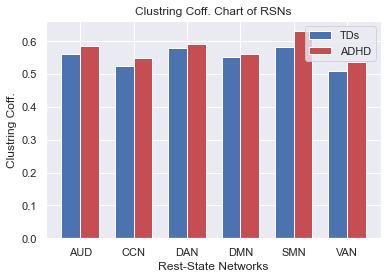

In [769]:
import matplotlib.pyplot as plt


RSNs=['AUD', 'CCN', 'DAN', 'DMN', 'SMN', 'VAN']
# TDs=[0.5428,0.5244,0.5798,0.5284,0.5767, 0.4943]
# ADHD=[0.5670, 0.5483, 0.5913,0.5192,0.6206, 0.5352]
# Define the data
groups = RSNs #['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']
value1 = TDs #[10, 15, 12, 8, 7, 9]  # Values for the first set
value2 = ADHD #[5, 8, 6, 12, 9, 11]   # Values for the second set

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the x-axis ticks
x_pos = range(len(groups))

# Create the bar chart for value1
ax.bar(x_pos, value1, width=bar_width, color='b', label='TDs')

# Create the bar chart for value2, shifted by the bar width
ax.bar([x + bar_width for x in x_pos], value2, width=bar_width, color='r', label='ADHD')

# Set the labels and title
ax.set_xlabel('Rest-State Networks')
ax.set_ylabel('Clustring Coff.') #'Global Efficiency'
ax.set_title('Clustring Coff. Chart of RSNs') #'Global efficiency Chart of RSNs'

# Set the x-axis tick labels
ax.set_xticks([x + bar_width / 2 for x in x_pos])
ax.set_xticklabels(groups)

# Add a legend
ax.legend()

# Display the chart

plt.savefig('Cluster_Coff.png') #'Global_Eff.png'
plt.show()

In [669]:
tList=[]
dList=[]
dHList=[]
for th in np.arange(0.1,0.9,0.05):
    CM1=TypDevMatrix
    CM1= np.where(CM1 < th, 0, CM1)
    den1=compute_network_density(CM1)
    tList.append(th)
    dList.append(den1)
    
    CM2=ADHDMatrix
    CM2= np.where(CM2 < th, 0, CM2)
    den2=compute_network_density(CM2)
#     tList.append(th)
    dHList.append(den2)
#     print(th)


# print(f"threshold list={tList}")    
# print(f"density for Typ Development list={dList}")
# print(f"density for ADHD list={dHList}")


In [671]:
np.set_printoptions(precision=4)
t=np.array(tList)
d1=np.array(dList)
d2=np.array(dHList)
print(f"threshold list={t}")    
print(f"density for Typ Development list={d1}")
print(f"density for ADHD list={d2}")

threshold list=[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85]
density for Typ Development list=[0.3642 0.36   0.3495 0.3268 0.2886 0.2452 0.1923 0.1438 0.1016 0.0642
 0.0397 0.0265 0.019  0.0144 0.0118 0.0091]
density for ADHD list=[0.386  0.3834 0.3753 0.3574 0.3258 0.2836 0.2319 0.1748 0.1245 0.0844
 0.0546 0.0367 0.0235 0.0168 0.0127 0.0095]


In [651]:
CM=np.array([0.1,.6,.2,.4])
CM= np.where(CM < 0.3, 0, CM)
CM

array([0. , 0.6, 0. , 0.4])

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def plot_confusion_matrix(confusion_matrix, labels):
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_matrix, annot=False, fmt="f", cmap="winter", cbar=True,   #Blues
                xticklabels=labels, yticklabels=labels)

    ax.set_title('Correlation Matrix')
    plt.savefig('Corr_Matrix_Figure.png', bbox_inches='tight', pad_inches=0.0)
    plt.show()
    
    
CM=CorMat.copy()
plot_confusion_matrix(CM,[])
# ------------------------------------------------
# --------------------------------------------------
# # Assuming you have a correlation matrix stored in a variable called 'corr_matrix'
# # You can load it from a file or calculate it using a library like numpy or pandas

# corr_matrix= CM
# # # Display the correlation matrix as a heatmap
# # sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
# # plt.title('Correlation Matrix')
# # plt.show()

# # Extract the upper triangular part of the correlation matrix (excluding the diagonal)
# upper_triangle = np.triu(corr_matrix, k=1)

# # Calculate the average correlation coefficient
# average_corr = np.mean(upper_triangle)

# # Find the pair of regions with the highest correlation coefficient
# max_corr_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
# max_corr_value = upper_triangle[max_corr_indices]

# # Print the results
# print('Average correlation coefficient:', average_corr)
# print('Pair with highest correlation coefficient:', max_corr_indices, 'with value:', max_corr_value)


NameError: name 'CorMat' is not defined

CM  [[ 1.          0.77413316  0.64108311 ...  0.4561267   0.31880009
  -0.00488244]
 [ 0.77413316  1.          0.52570928 ...  0.42865426  0.24756319
  -0.04449049]
 [ 0.64108311  0.52570928  1.         ...  0.30655843  0.30460712
  -0.01708417]
 ...
 [ 0.4561267   0.42865426  0.30655843 ...  1.          0.49682669
   0.07501392]
 [ 0.31880009  0.24756319  0.30460712 ...  0.49682669  1.
   0.27800977]
 [-0.00488244 -0.04449049 -0.01708417 ...  0.07501392  0.27800977
   1.        ]]
CM shape = (116, 116)
df_corr.columns = RangeIndex(start=0, stop=116, step=1)
 len=116   cluster_labels =[0 0 0 0 1 1 0 0 1 1 5 5 5 5 1 1 5 5 0 0 1 1 1 1 1 1 1 1 4 4 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 1 1 0 0 0 0 0 0 0 0
 4 4 0 0 5 5 5 5 1 1 0 0 1 1 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 2 3 0
 0 0 0 0 2] 


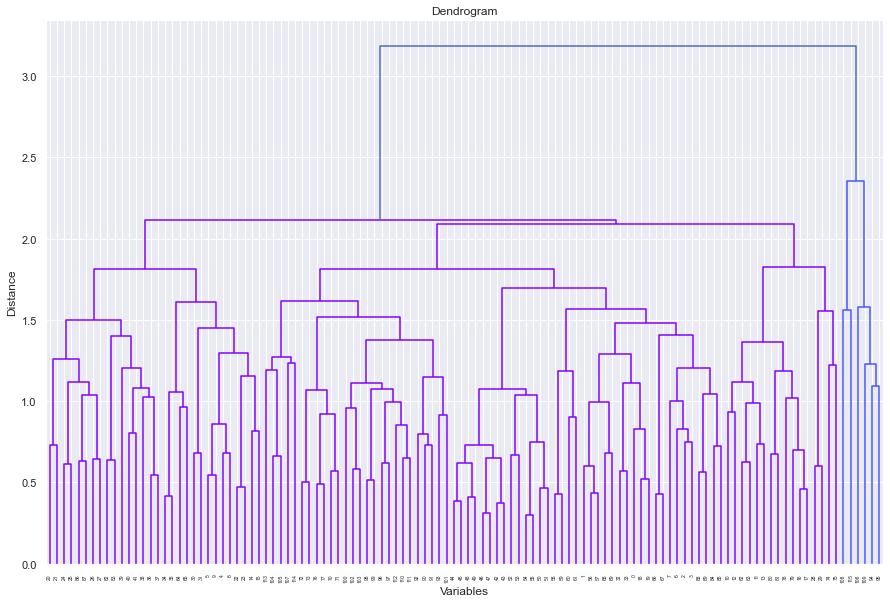

In [593]:
# -------------------------- 6 clusters ---------------------
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl

def count_values_in_range(arr, lower, upper):
    count = 0
    for num in arr:
        if lower <= num <= upper:
            count += 1
    return count
# -----------------------------------------------

print('CM ', CM)
CM= np.array(CM)
# CM= np.where(CM < -0.2, 0, CM)

# CCMM2= np.where(CCMM >= 0.9, 0, CCMM)

# print('CCMM2', CCMM2)

# result = count_values_in_range(CCMM2.all(), 0.2 , 0.9)
# print(f"Count 0.2-0.9 = {result} from total {len(CCMM2)}")


# result_array = np.where(my_array < 4, X, Y)


correlation_matrix=CM.copy()
print('CM shape =', correlation_matrix.shape)
# Assuming you have a correlation matrix stored in a variable named 'correlation_matrix'
df_corr = pd.DataFrame(correlation_matrix)
print(f"df_corr.columns = {df_corr.columns}")
# Perform hierarchical clustering
#  linkage options (Single , Complete, Average, Ward )
# Distance Metric options (Euclidean ,Manhattan ,)
# Example
# model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# model.fit(X)
# labels = model.labels_
clustering = AgglomerativeClustering(n_clusters=6, linkage='average') #affinity='precomputed', 'average' affinity='manhattan'
clustering.fit(correlation_matrix)
# Retrieve cluster assignments
cluster_labels = clustering.labels_
print(f" len={len(cluster_labels)}   cluster_labels ={cluster_labels} ")

# --------------------------------------------------------
# Plot dendrogram
plt.figure(figsize=(15, 10))  
# Plot dendrogram
dendro = hierarchy.dendrogram(hierarchy.linkage(correlation_matrix, method='average'), color_threshold=2.7) 
                                                        # labels=df_corr.columns, , color_threshold=2.0
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()
# --------------------------------------------------------------

cluster_labels= [0 0 0 0 1 1 0 0 1 1 5 5 5 5 1 1 5 5 0 0 1 1 1 1 1 1 1 1 4 4 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 1 1 0 0 0 0 0 0 0 0
 4 4 0 0 5 5 5 5 1 1 0 0 1 1 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 2 3 0
 0 0 0 0 2]


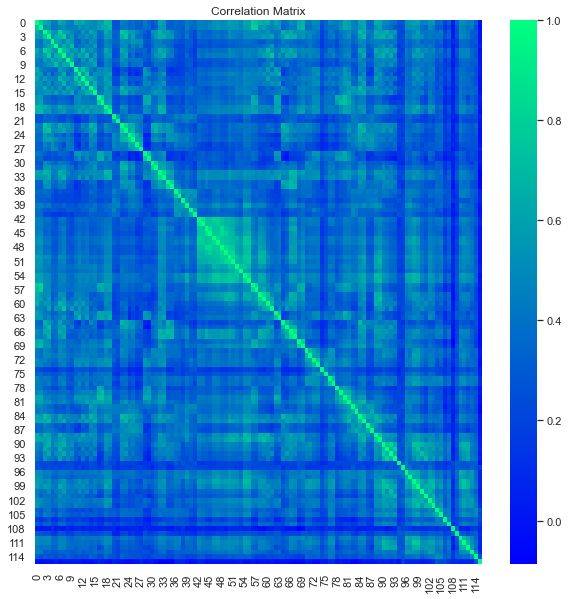

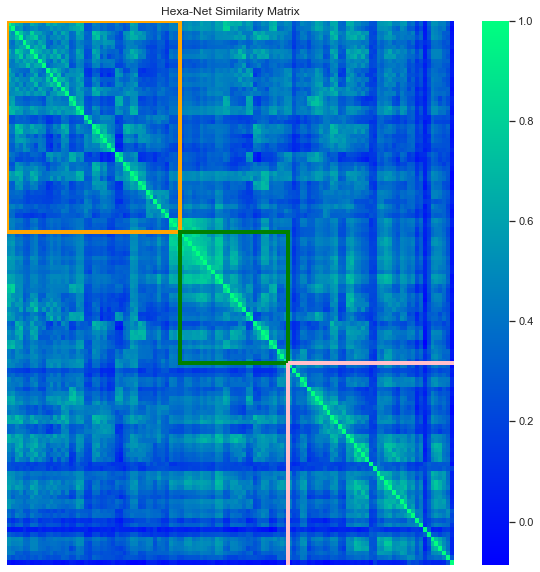

In [594]:
def bubble_sort(arr, arr2):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n - 1):
        # Last i elements are already in place
        for j in range(0, n - i - 1):
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                arr2[j], arr2[j + 1] = arr2[j + 1], arr2[j]
                
    return arr,arr2

# a=[3,5,2]
# x=[[2,2] , [3,3], [1,1]]
# b,c=bubble_sort(a,x)
# print(b)
# print(c)

def plot_confusion_matrix(confusion_matrix, cluster_labels):
    
    print(f"cluster_labels= {cluster_labels}")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(confusion_matrix, annot=False, fmt="f", cmap="winter", cbar=True) #,   #Blues
#                 xticklabels=labels, yticklabels=labels)

    ax.set_title('Correlation Matrix')
    imgName= "CorrMat_SubID_"+ str(subject_ids[idx])+ "_Type_"+ adhd[idx]+"_no1.jpg"
    plt.savefig(imgName, bbox_inches='tight', pad_inches=0.0)

def plot_colored_confusion_matrix(confusion_matrix, cluster_labels, Is_Sorted):
#     cluster_labels.sort()
   
#   ----------------------------------------  
#     sorted_arrays = sorted(zip(cluster_labels, confusion_matrix))
#     # Zip the arrays together
#     zipped = zip(cluster_labels, confusion_matrix)

#     # Sort the zipped pairs based on the first array
#     sorted_pairs = sorted(zipped, key=lambda x: x[0])
#     sorted_cluster_labels, sorted_confusion_matrix = zip(*sorted_pairs)
#     sorted_cluster_labels=np.array(sorted_cluster_labels)
#     print(f" sorted Cluster labels={sorted_cluster_labels}")
    fdf=""
    if Is_Sorted==True:
        sorted_cluster_labels, sorted_confusion_matrix=bubble_sort(cluster_labels,confusion_matrix)
        fdf="_no3"
    else:
        sorted_cluster_labels= cluster_labels
        sorted_confusion_matrix= confusion_matrix
        fdf="_no2"
# ------------------------------------------------
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(sorted_confusion_matrix, annot=False, fmt="f", cmap="winter", cbar=True,xticklabels=False, yticklabels=False)#,   #Blues
#                 xticklabels=labels, yticklabels=labels)

    ax.set_title('Hexa-Net Similarity Matrix')
#   print(f"i={i}..id={subject_ids[i]}..path={dataset.func[i]} ADHD={adhd_labels[i]} {adhd[i]}")
    
    
    colorsL=['orange', 'green','pink','cyan', 'yellow','red']
    dim_min=[0, 45, 73, 137, 200,  248]
    dim_max=[44,72, 136,200, 247,  263]
    for i in range(6):
        cluster_indices = np.where(sorted_cluster_labels == i)[0]
        min_idx =dim_min[i]  # min(cluster_indices)
        max_idx =dim_max[i]  # max(cluster_indices)

        rect = plt.Rectangle((min_idx, min_idx), max_idx - min_idx + 1, max_idx - min_idx + 1, 
                         fill=False, edgecolor=colorsL[i], linewidth=4)
        ax.add_patch(rect)

    
    imgName= "CorrMat_SubID_"+ str(subject_ids[idx])+ "_Type_"+ adhd[idx]+fdf+".png"
    plt.savefig(imgName)
    plt.show()
    
    
plot_confusion_matrix(CM,cluster_labels)
plot_colored_confusion_matrix(CM,cluster_labels, False)
# plot_colored_confusion_matrix(CM,cluster_labels, True)

In [ ]:
imgName= "CorrMat_SubID_"+ str(subject_ids[idx])+ "_itsType_"+ adhd[2]+".jpg"
print(imgName)

In [595]:
import pickle

# Matrix to be saved
matrix = CM # [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Saving the matrix
with open('matrix.pkl', 'wb') as file:
    pickle.dump(matrix, file)

# Retrieving the matrix
with open('matrix.pkl', 'rb') as file:
    saved_matrix = pickle.load(file)

# Printing the retrieved matrix
print(saved_matrix)


[[ 1.          0.77413316  0.64108311 ...  0.4561267   0.31880009
  -0.00488244]
 [ 0.77413316  1.          0.52570928 ...  0.42865426  0.24756319
  -0.04449049]
 [ 0.64108311  0.52570928  1.         ...  0.30655843  0.30460712
  -0.01708417]
 ...
 [ 0.4561267   0.42865426  0.30655843 ...  1.          0.49682669
   0.07501392]
 [ 0.31880009  0.24756319  0.30460712 ...  0.49682669  1.
   0.27800977]
 [-0.00488244 -0.04449049 -0.01708417 ...  0.07501392  0.27800977
   1.        ]]


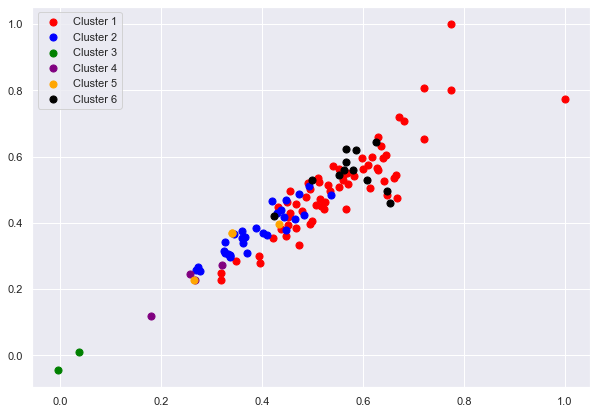

In [596]:
labels=clustering.labels_
X= CM
# print('X=', X)
plt.figure(figsize=(10, 7))
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red', label = 'Cluster 1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue', label = 'Cluster 2')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green', label = 'Cluster 3')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple', label = 'Cluster 4')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange', label = 'Cluster 5')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='black', label = 'Cluster 6')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 7))
# plt.scatter(iris_x[labels == 0, 0], iris_x[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
# plt.scatter(iris_x[labels == 1, 0], iris_x[labels == 1, 1], s = 100, c = 'yellow', label = 'Type 2')
# plt.scatter(iris_x[labels == 2, 0], iris_x[labels == 2, 1], s = 100, c = 'green', label = 'Type 3')
# plt.legend()
# plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import random
import string

X = np.random.randint(0, 10, size=(120, 10))
df = pd.DataFrame(X)

# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(df.values, orientation='bottom')
fig.for_each_trace(lambda trace: trace.update(visible=False))

for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
# dendro_side = ff.create_dendrogram(X, orientation='right', labels = labels)
dendro_side = ff.create_dendrogram(X, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(df.values)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# # Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

fig.update_layout(paper_bgcolor="rgba(0,0,0,0)",
                  plot_bgcolor="rgba(0,0,0,0)",
                  xaxis_tickfont = dict(color = 'rgba(0,0,0,0)'))

fig.show()


Labels = [5 3 4 0 1 3]


ValueError: min() arg is an empty sequence

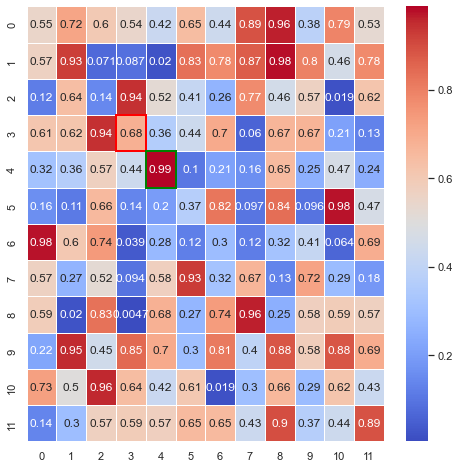

In [215]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a sample correlation matrix
np.random.seed(0)
corr_matrix = np.random.rand(12, 12)

# Generate sample cluster labels for each variable
np.random.seed(1)
cluster_labels = np.random.randint(0, 6, size=6)
print(f"Labels = {cluster_labels}")

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)

# Draw colored squares around the clusters
colorsL=['red', 'green','blue','yellow', 'orange','cyan']
for i in range(6):
    cluster_indices = np.where(cluster_labels == i)[0]
    min_idx = min(cluster_indices)
    max_idx = max(cluster_indices)
    rect = plt.Rectangle((min_idx, min_idx), max_idx - min_idx + 1, max_idx - min_idx + 1, 
                         fill=False, edgecolor=colorsL[i], linewidth=2)
    ax.add_patch(rect)

plt.show()


In [160]:
# ------------------------ 6 clusters with colored square --------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering


correlation_matrix = pd.DataFrame(CM)
correlation_array = correlation_matrix.values
print('CM =', correlation_matrix.values)

print('type CM ', type(correlation_array))


clustering = AgglomerativeClustering(n_clusters=6)
clusters = clustering.fit_predict(correlation_array)
print('Clusters= ', clusters)
# --------------------------------------------------------------------------
# Plot dendrogram
# dendro = hierarchy.dendrogram(hierarchy.linkage(correlation_array, method='average'), labels=df_corr.columns)

# # fig, ax = plt.subplots(figsize=(15, 15))
# plt.xlabel('Variables')
# plt.ylabel('Distance')
# plt.title('Dendrogram')
# plt.show()

# ----------------------------------------------------------------------------
correlation_matrix['Cluster'] = clusters
print('correlation_matrix(Cluster)  ', correlation_matrix['Cluster'])

correlation_matrix = correlation_matrix.sort_values(by='Cluster', axis=0)
correlation_matrix = correlation_matrix.sort_values(by='Cluster', axis=1)

sns.set(font_scale=1.0)
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar=True) #annot=True,
plt.show()


CM = [[ 1.          0.87155679  0.67145727 ...  0.42094898  0.31017928
  -0.05330413]
 [ 0.87155679  1.          0.63580256 ...  0.49284008  0.33813382
  -0.0686667 ]
 [ 0.67145727  0.63580256  1.         ...  0.57546285  0.29804018
   0.02741531]
 ...
 [ 0.42094898  0.49284008  0.57546285 ...  1.          0.41203358
   0.0750209 ]
 [ 0.31017928  0.33813382  0.29804018 ...  0.41203358  1.
   0.38122037]
 [-0.05330413 -0.0686667   0.02741531 ...  0.0750209   0.38122037
   1.        ]]
type CM  <class 'numpy.ndarray'>
Clusters=  [2 2 4 4 3 2 2 2 3 2 2 2 2 2 2 4 2 2 2 2 5 5 4 4 4 4 5 3 2 2 4 4 4 4 0 0 4
 4 5 4 4 5 0 0 0 0 0 0 0 0 0 0 0 0 4 0 2 2 0 0 2 2 2 2 0 0 0 0 0 0 5 4 2 1
 3 4 4 2 2 2 2 5 1 4 4 5 5 4 0 4 0 0 1 1 5 3 4 0 3 3 1 1 1 0 1 0 0 0 1]
correlation_matrix(Cluster)   0      2
1      2
2      4
3      4
4      3
      ..
104    1
105    0
106    0
107    0
108    1
Name: Cluster, Length: 109, dtype: int64


KeyError: 'Cluster'

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.87155679  0.          0.         ...  0.          0.
   0.        ]
 [ 0.67145727  0.63580256  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.42094898  0.49284008  0.57546285 ...  0.          0.
   0.        ]
 [ 0.31017928  0.33813382  0.29804018 ...  0.41203358  0.
   0.        ]
 [-0.05330413 -0.0686667   0.02741531 ...  0.0750209   0.38122037
   0.        ]]


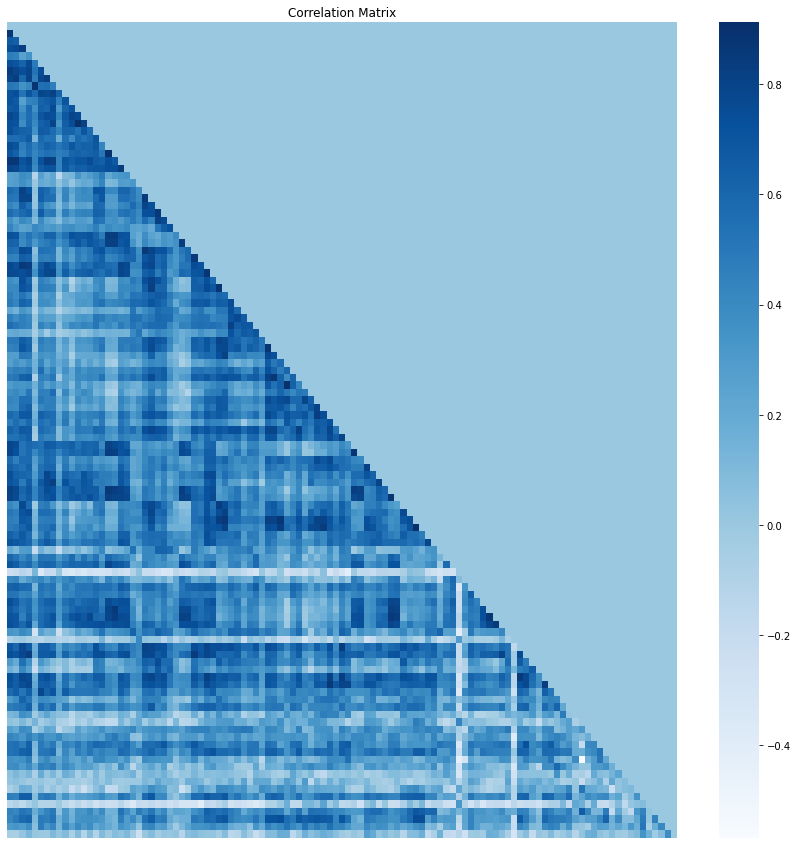

In [107]:
# Extract the lower triangular matrix
lower_triangular_matrix = np.tril(correlation_matrix)
np.fill_diagonal(lower_triangular_matrix, 0)

CM=lower_triangular_matrix
# final_CM= CM[CM]
# Print the lower triangular matrix
print(lower_triangular_matrix)


plot_confusion_matrix(lower_triangular_matrix,[])


In [99]:
import numpy as np
import nibabel as nib
from nilearn import input_data  # connectivity
import networkx as nx

# Create a graph from the correlation matrix
correlation_matrix= lower_triangular_matrix #corr_matrix
graph = nx.from_numpy_array(correlation_matrix)

# Compute small-worldness
# small_worldness = nx.algorithms.smallworld.sigma(graph, niter=100)
# print("Small-worldness:", small_worldness)


Graph with 109 nodes and 5886 edges
<class 'networkx.classes.graph.Graph'>


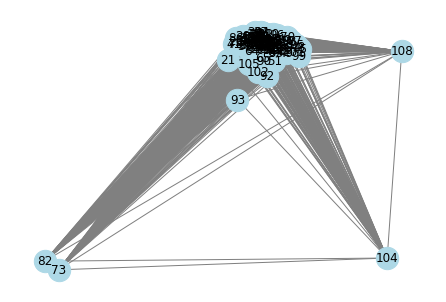

In [100]:
print(graph)
print(type(graph))
# Draw the graph
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')

# Show the graph
plt.show()

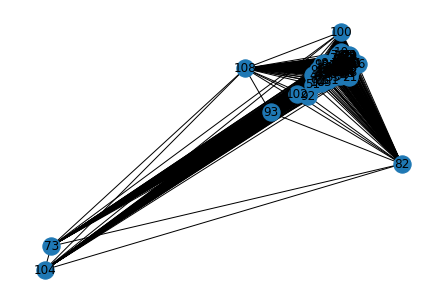

[[ 0.          0.87155679  0.67145727 ...  0.42094898  0.31017928
  -0.05330413]
 [ 0.87155679  0.          0.63580256 ...  0.49284008  0.33813382
  -0.0686667 ]
 [ 0.67145727  0.63580256  0.         ...  0.57546285  0.29804018
   0.02741531]
 ...
 [ 0.42094898  0.49284008  0.57546285 ...  0.          0.41203358
   0.0750209 ]
 [ 0.31017928  0.33813382  0.29804018 ...  0.41203358  0.
   0.38122037]
 [-0.05330413 -0.0686667   0.02741531 ...  0.0750209   0.38122037
   0.        ]]


In [101]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined correlation_matrix
correlation_matrix = lower_triangular_matrix
graph = nx.from_numpy_array(correlation_matrix)

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)
plt.show()

graph_array = nx.to_numpy_array(graph)
print(graph_array)


In [ ]:
# Extract the lower triangular matrix
lower_triangular_matrix = np.tril(correlation_matrix)

# Print the lower triangular matrix
print(lower_triangular_matrix)

In [90]:
# Compute modularity
modularity = nx.algorithms.community.modularity_max.greedy_modularity_communities(graph)
print("Modularity:", modularity)
print(type(modularity))
# c = nx.community.greedy_modularity_communities(graph)
# print(c)


Modularity: [frozenset({0}), frozenset({1}), frozenset({2}), frozenset({3}), frozenset({4}), frozenset({5}), frozenset({6}), frozenset({7}), frozenset({8}), frozenset({9}), frozenset({10}), frozenset({11}), frozenset({12}), frozenset({13}), frozenset({14}), frozenset({15}), frozenset({16}), frozenset({17}), frozenset({18}), frozenset({19}), frozenset({20}), frozenset({21}), frozenset({22}), frozenset({23}), frozenset({24}), frozenset({25}), frozenset({26}), frozenset({27}), frozenset({28}), frozenset({29}), frozenset({30}), frozenset({31}), frozenset({32}), frozenset({33}), frozenset({34}), frozenset({35}), frozenset({36}), frozenset({37}), frozenset({38}), frozenset({39}), frozenset({40}), frozenset({41}), frozenset({42}), frozenset({43}), frozenset({44}), frozenset({45}), frozenset({46}), frozenset({47}), frozenset({48}), frozenset({49}), frozenset({50}), frozenset({51}), frozenset({52}), frozenset({53}), frozenset({54}), frozenset({55}), frozenset({56}), frozenset({57}), frozenset({

In [85]:
# Compute network efficiency
efficiency1 = nx.global_efficiency(graph) #algorithms.efficiency.

# Print the results
print("Network Global efficiency:", efficiency1)


# Compute network efficiency
efficiency2 = nx.local_efficiency(graph) # algorithms.efficiency.
print("Network Local efficiency:", efficiency2)

Network Global efficiency: 1.0
Network Local efficiency: 1.0


In [78]:
# --------------------- OK RUN it plz
import numpy as np
import pandas as pd

# Assuming you already have a correlation matrix stored in 'correlation_matrix'
# If not, you can calculate it using functions like np.corrcoef() or pd.DataFrame.corr()
correlation_matrix =corr_matrix
# np.array([[1.0, 0.8, 0.2, 0.1],
#                               [0.8, 1.0, 0.4, 0.3],
#                               [0.2, 0.4, 1.0, 0.9],
#                               [0.1, 0.3, 0.9, 1.0]])

# Convert the correlation matrix to a DataFrame for easier manipulation
df = pd.DataFrame(correlation_matrix)

# Set the column names to represent different regions
 
numbers= [x for x in range(1, 110)]
region_names = [str(num) for num in numbers]

# ['Region A', 'Region B', 'Region C', 'Region D']
df.columns = region_names
df.index = region_names

# Set a correlation threshold (e.g., 0.7) to define what is considered a high correlation
correlation_threshold = 0.7

# Find the highly correlated regions
highly_correlated_regions = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if abs(df.iloc[i, j]) > correlation_threshold:
            highly_correlated_regions.append((df.columns[i], df.columns[j], df.iloc[i, j]))

# Print the highly correlated regions and their correlation values
for region1, region2, correlation in highly_correlated_regions:
    print(f"{region1} and {region2} are highly correlated with a correlation value of {correlation}.")


1 and 2 are highly correlated with a correlation value of 0.8715567860802141.
1 and 4 are highly correlated with a correlation value of 0.7384002524944606.
1 and 6 are highly correlated with a correlation value of 0.7427357759308809.
1 and 7 are highly correlated with a correlation value of 0.8391300781090529.
1 and 8 are highly correlated with a correlation value of 0.7935556787829613.
1 and 10 are highly correlated with a correlation value of 0.7130643532647702.
1 and 11 are highly correlated with a correlation value of 0.7180645939572381.
1 and 13 are highly correlated with a correlation value of 0.7835809099874376.
1 and 14 are highly correlated with a correlation value of 0.7313422328159114.
1 and 15 are highly correlated with a correlation value of 0.7325138047069752.
1 and 17 are highly correlated with a correlation value of 0.7532781843790259.
1 and 19 are highly correlated with a correlation value of 0.8689146005961187.
1 and 20 are highly correlated with a correlation value o

In [28]:
import nibabel as nib
import numpy as np
from nilearn import datasets
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn.regions import connected_label_regions
from nilearn.maskers import NiftiLabelsMasker 
from nilearn import maskers
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

AtlasPath= 'Hexa_AAL.nii.gz'  #'Org_Atlases/Yeo7Atlas_6RSNs.nii.gz' #  HexaNet_ATLAS.nii.gz
atlas_img=nib.load(AtlasPath)
atlas_data = atlas_img.get_fdata()
region_labels = connected_label_regions(atlas_img)
print("Size of region_labels image :", region_labels.shape)
atlas_data = atlas_data.astype(int)
atlas_data = atlas_data.reshape(atlas_data.shape[0]*atlas_data.shape[1]*atlas_data.shape[2], 1)
print('atlas_data', atlas_data.shape)

# func_file = '../data/ds000030/derivatives/fmriprep/sub-10788/func/sub-10788_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
# func_file = r'G:\ADHD200-Dataset\ADHD DATA part 1 KK_second 10 images\KKI_1735881_1\rest_1\NIfTI\rest.nii.gz'
# r'G:\ADHD200-Dataset\ADHD DATA part 1 KK_first 10 images\KKI_1018959_1\rest_1\NIfTI\rest.nii.gz'
adhd_dataset = datasets.fetch_adhd(n_subjects=30)  
func_file = adhd_dataset.func[4]
func_img = nib.load(func_file)
func_data = func_img.get_fdata()
func_data = func_data.reshape(func_img.shape[0]*func_img.shape[1]*func_img.shape[2], func_img.shape[3])
print('func_data shape', func_data.shape)

# time_ser = np.mean(func_data[:, :], axis=1)
# print('time_ser shape ',time_ser.shape)

# Print dimensions of functional image and atlas image

print("Size of functional image:", func_img.shape)
print("Size of atlas image:", region_labels.shape)

resampled_atlas = nimg.resample_to_img(region_labels, func_img, interpolation = 'nearest')
print("Size of ReSample Atlas:", resampled_atlas.shape)

atlas_data = resampled_atlas.get_fdata()
atlas_data = atlas_data.astype(int)

# atlas_data[atlas_data == 2]=0
# atlas_data[atlas_data == 4]=0
# atlas_data[atlas_data == 5]=0


atlas_data = atlas_data.reshape(atlas_data.shape[0]*atlas_data.shape[1]*atlas_data.shape[2], 1)
print('atlas_data', atlas_data.shape)

nonzero_indices = np.nonzero(atlas_data)[0]
print('nonzero_indices--',nonzero_indices)

nz_atlas_data=atlas_data[nonzero_indices]
print('nz_atlas_data', nz_atlas_data)


# nz_time_ser= time_ser[nonzero_indices]  
nz_time_ser= func_data[nonzero_indices]
nz_time_ser= nz_time_ser.transpose()



print('nz_atlas_data', nz_atlas_data.shape)
print('nz_time_ser', nz_time_ser.shape[0])
print('nz_time_ser shape', nz_time_ser.shape)
print('nz_time_ser type', type(nz_time_ser))
# ----------------------------------------------------------
CM_dim= nz_time_ser.shape[0]


from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting



correlation_measure = ConnectivityMeasure(kind='correlation')
# time_Series= np.zeros((2, nz_time_ser.shape[0]))
# nz_time_ser= nz_time_ser.reshape(1, nz_time_ser.shape[0])
# print('nz_time_ser shape', nz_time_ser.shape)
# time_Series[0]= nz_time_ser
# time_Series[1]= nz_time_ser

Corr_matrix = correlation_measure.fit_transform([nz_time_ser])     

print('Corr_matrix shape ',Corr_matrix.shape)        
print(Corr_matrix)



Size of region_labels image : (91, 109, 91)
atlas_data (902629, 1)
func_data shape (271633, 77)
Size of functional image: (61, 73, 61, 77)
Size of atlas image: (91, 109, 91)
Size of ReSample Atlas: (61, 73, 61)
atlas_data (271633, 1)
nonzero_indices-- [ 32717  32718  32719 ... 237987 238040 238043]
nz_atlas_data [[133]
 [133]
 [133]
 ...
 [132]
 [132]
 [132]]
nz_atlas_data (33816, 1)
nz_time_ser 77
nz_time_ser shape (77, 33816)
nz_time_ser type <class 'numpy.ndarray'>


MemoryError: Unable to allocate 8.52 GiB for an array with shape (33816, 33816) and data type float64

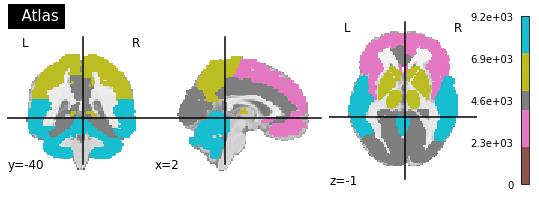

AAL.nii.gz
no_of_labels = 116
uniqe labels = [2001 2002 2101 2102 2111 2112 2201 2202 2211 2212 2301 2302 2311 2312
 2321 2322 2331 2332 2401 2402 2501 2502 2601 2602 2611 2612 2701 2702
 3001 3002 4001 4002 4011 4012 4021 4022 4101 4102 4111 4112 4201 4202
 5001 5002 5011 5012 5021 5022 5101 5102 5201 5202 5301 5302 5401 5402
 6001 6002 6101 6102 6201 6202 6211 6212 6221 6222 6301 6302 6401 6402
 7001 7002 7011 7012 7021 7022 7101 7102 8101 8102 8111 8112 8121 8122
 8201 8202 8211 8212 8301 8302 9001 9002 9011 9012 9021 9022 9031 9032
 9041 9042 9051 9052 9061 9062 9071 9072 9081 9082 9100 9110 9120 9130
 9140 9150 9160 9170]
No. of Non-Zero Voxels = 185405
Size of brain Atlas (No. of Voxels) = 902629


In [27]:
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    atlas_flat[atlas_flat == 2]=0
    atlas_flat[atlas_flat == 4]=0
    atlas_flat[atlas_flat == 5]=0
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_flat)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
AtlasPath='AAL.nii.gz'#'Org_Atlases/Yeo7Atlas_6RSNs.nii.gz'
plotting_image(AtlasPath,"  Atlas")
Display_Img_Labels(AtlasPath)

In [74]:
import numpy as np

arr = np.array([0, 1, 2, 0, 3, 0, 4])

nonzero_indices = np.nonzero(arr)[0]
print(nonzero_indices)

arr1= arr[nonzero_indices]
print(arr1)

[1 2 4 6]
[1 2 3 4]


In [50]:
import numpy as np
from scipy.stats import pearsonr

# Assuming you have two arrays of fMRI data
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([2, 4, 6, 8, 10])

# Calculate the correlation coefficient
corr_coeff, p_value = pearsonr(data1, data2)

# Print the correlation coefficient
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

# correlation = np.corrcoef(x, y)
# print(correlation)

Correlation coefficient: 1.0
p-value: 0.0


In [ ]:
#tttttttttt======================= from Chat GPT ====================================
import numpy as np
from scipy import stats

# Step 1: Preprocess the functional connectivity data

# Assume you have preprocessed functional connectivity data in the variable 'connectivity_data'
# connectivity_data should be a 2D array of shape (num_ROIs, num_ROIs) containing connectivity values

# Step 2: Define the brain atlas

# Assume you have a brain atlas stored in the variable 'brain_atlas'
# brain_atlas should be a 1D array of shape (num_ROIs,) containing labels or indices for each ROI

# Step 3: Calculate functional connectivity matrices

# Compute the correlation matrix
correlation_matrix = np.corrcoef(connectivity_data)

# Step 4: Compute within-module connectivity

within_module_connectivity = []
unique_modules = np.unique(brain_atlas)

for module in unique_modules:
    module_indices = np.where(brain_atlas == module)[0]
    module_connectivity = np.mean(correlation_matrix[module_indices][:, module_indices])
    within_module_connectivity.append(module_connectivity)

# Step 5: Compute between-module connectivity

between_module_connectivity = []

for module_i in unique_modules:
    for module_j in unique_modules:
        if module_i != module_j:
            module_i_indices = np.where(brain_atlas == module_i)[0]
            module_j_indices = np.where(brain_atlas == module_j)[0]
            between_connectivity = np.mean(correlation_matrix[module_i_indices][:, module_j_indices])
            between_module_connectivity.append(between_connectivity)

# Step 6: Compute homogeneity measures

within_module_homogeneity = np.mean(within_module_connectivity) / np.mean(correlation_matrix)
between_module_homogeneity = np.mean(between_module_connectivity) / np.mean(correlation_matrix)

# Step 7: Analyze and interpret the results

print("Within-module homogeneity:", within_module_homogeneity)
print("Between-module homogeneity:", between_module_homogeneity)


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score

# Generate random data (replace with your actual brain data)
data = np.random.rand(100, 10)

# Define the number of clusters for brain parcellation
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(data)

# Compute homogeneity score
# homogeneity = homogeneity_score(true_labels, labels)
# print("Homogeneity Score:", homogeneity)

# Compute silhouette score
silhouette = silhouette_score(data, labels)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.11015154318138988


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

def compute_homogeneity(labels_true, labels_pred):
    """
    Compute homogeneity score for clustering evaluation.

    Arguments:
    - labels_true: true labels of the data
    - labels_pred: predicted labels from the clustering algorithm

    Returns:
    - homogeneity_score: homogeneity score
    """
    from sklearn.metrics import homogeneity_score
    homogeneity_score = homogeneity_score(labels_true, labels_pred)
    return homogeneity_score


def compute_silhouette(X, labels):
    """
    Compute silhouette score for clustering evaluation.

    Arguments:
    - X: feature matrix or data points
    - labels: predicted labels from the clustering algorithm

    Returns:
    - silhouette_avg: average silhouette score
    """
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

# Assuming you have functional connectivity data stored in 'connectivity_data.npy'
connectivity_data = np.load('connectivity_data.npy')

# Assuming you have true labels for evaluation stored in 'true_labels.npy'
true_labels = np.load('true_labels.npy')

# Assuming you have predicted labels from clustering algorithm stored in 'predicted_labels.npy'
predicted_labels = np.load('predicted_labels.npy')

# Compute homogeneity
homogeneity = compute_homogeneity(true_labels, predicted_labels)
print("Homogeneity score:", homogeneity)

# Compute silhouette score
silhouette_avg = compute_silhouette(connectivity_data, predicted_labels)
print("Silhouette score:", silhouette_avg)


In [128]:
# Example condition
condition = True

# Example array
my_array = [[1, 2, 3], [4, 5, 6]]
my_array = np.array(my_array)
# Example values to fill
X = 10
Y = 20

# Fill array based on condition
# result_array = [X if element<4 else Y for element in my_array]

import numpy as np

result_array = np.where(my_array < 4, X, Y)

# Print the result
print(result_array)


[[10 10 10]
 [20 20 20]]


In [153]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
  
# Load dataset
df = sns.load_dataset('iris')
  
# Convert categorical values to numeric
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
  
# Create correlation matrix
corr_mat = df.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

petal_length  sepal_width    -0.428440
species       sepal_width    -0.426658
petal_width   sepal_width    -0.366126
sepal_width   sepal_length   -0.117570
species       sepal_length    0.782561
petal_width   sepal_length    0.817941
petal_length  sepal_length    0.871754
species       petal_length    0.949035
              petal_width     0.956547
petal_width   petal_length    0.962865
dtype: float64


C:\Users\IT-Department\AppData\Local\Temp\ipykernel_8088\1609745749.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
